#CS733: Module 1 Assignment: N-Grams

AJ Broderick *(UIN 01244170)* \
abrod006@odu.edu \

##Import Libraries & Read Data

In [1]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.util import ngrams
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

from collections import Counter
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tabulate import tabulate

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
url = 'https://raw.githubusercontent.com/aj-broderick/ODU-CS733/main/data/all-data.csv'
data = pd.read_csv(url,encoding='latin-1')
newsheadline = data['newsheadline']

###Data Exploration

&emsp; Before the n-gram analysis is performed, a high level exploration of the data is performed to understand the data better. This includes looking at the columns of the dataset. There are two columns in the data, the headline of the article itself and the sentiment, that describes if the headline is positive, negative or netural in tone.\
&emsp; Using the `info()` function, the overall shape of the dataframe that is created is pulled. This is used later in the analysis to undestand how much data is in the overall dataset and to confirm the splitting of the data for training and testing.

In [3]:
data.head()

,sentiment,newsheadline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     4846 non-null   object
 1   newsheadline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


##Task 1: N-gram Generation

###Extract N-grams

&emsp; For this analysis three level of n-grams will be utilized. The unigrams, bigram, and trigrams will give a good representation of the financial news headlines. To start, a function is first created that can take the news headlines into the different n-grams. \
&emsp; For the purpose of this analysis a few features were programmed into the fucntion. The first was doing a regex replace on all of the punctuation and special characters of the headline. These are not needed for the n-grams and would add unwanted data into the model. The regex also removes all numeric values from the headlines. This was done to simplify the dataset, since the model is working with financial news there is a chance many would include titles such as 'Company X has grown 15% in the last quarter'. Having all the different numeric values in the model would add complexity that is not needed. The other feature of the model is to remove the stops words from the new headlines as well.\
&emsp; Once the function is created, it is applied to the dataset to count the number of times each of the n-grams appear in the news headline. Utilzing the `Counter()` function, a counter subset is created for the unigrams, bigrams and trigrams.

In [5]:
# Function to generate n-grams
def generate_ngrams(headlines, n):
    ngram_list = []
    for headline in headlines:
        headline = re.sub('[^a-zA-Z ]', '', str(headline))
        regex = re.compile('[^a-zA-Z ]')
        stop_words = set(stopwords.words('english'))
        tokens = regex.sub('', headline)
        tokens = tokens.lower()
        tokens = nltk.word_tokenize(tokens)
        tokens = [word for word in tokens if word not in stop_words]
        ngram_list.extend(ngrams(tokens, n))
    return ngram_list

def ngrams_tuple(headlines, n):
    headline = re.sub('[^a-zA-Z ]', '', str(headlines))
    regex = re.compile('[^a-zA-Z ]')
    stop_words = set(stopwords.words('english'))
    tokens = regex.sub('', headline)
    tokens = tokens.lower()
    tokens = nltk.word_tokenize(tokens)
    tokens = [word for word in tokens if word not in stop_words]
    return list(ngrams(tokens, n))

In [6]:
# Apply function to create n-gram lists
unigrams = generate_ngrams(newsheadline, 1)
bigrams = generate_ngrams(newsheadline, 2)
trigrams = generate_ngrams(newsheadline, 3)

# Create Counter from n-gram lists
unigram_freq = Counter(unigrams)
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Create dictionaries from n-gram lists
unigram_dict = {ngram: count for ngram, count in unigram_freq.items()}
bigram_dict = {ngram: count for ngram, count in bigram_freq.items()}
trigram_dict = {ngram: count for ngram, count in trigram_freq.items()}

###Frequnecy Analysis

&emsp; Once each of the n-grams is created, a DataFrame for each is also created. The DataFrame is sorted on the count of the n-grams, and then the data is reindexed to ensure the data is sorted correctly. This is done primarily to assist in presenting the top words/tuples that appears in the news headlines. To present the top n-grams, the `head()` function is used to pull the 10 n-grams.

In [7]:
#Unigram DataFrame
unigram_df = pd.DataFrame.from_dict(unigram_freq, orient='index').reset_index()
unigram_df = unigram_df.rename(columns={"index": "unigram",0: "frequency"})
unigram_df = unigram_df.sort_values(by=['frequency'], ascending=False).reset_index()
unigram_df = unigram_df.drop(['index'], axis=1)

#Bigram DataFrame
bigram_df = pd.DataFrame.from_dict(bigram_freq, orient='index').reset_index()
bigram_df = bigram_df.rename(columns={"index": "bigram",0: "frequency"})
bigram_df = bigram_df.sort_values(by=['frequency'], ascending=False).reset_index()
bigram_df = bigram_df.drop(['index'], axis=1)

#Trigram DataFrame
trigram_df = pd.DataFrame.from_dict(trigram_freq, orient='index').reset_index()
trigram_df = trigram_df.rename(columns={"index": "trigram",0: "frequency"})
trigram_df = trigram_df.sort_values(by=['frequency'], ascending=False).reset_index()
trigram_df = trigram_df.drop(['index'], axis=1)

In [8]:
print(unigram_df.head(10))

      unigram  frequency
0      (eur,)       1310
1  (company,)        848
2       (mn,)        593
3     (said,)        544
4  (finnish,)        512
5    (sales,)        453
6  (million,)        441
7      (net,)        412
8   (profit,)        409
9  (finland,)        337


In [9]:
print(bigram_df.head(10))

                    bigram  frequency
0                (eur, mn)        554
1             (net, sales)        246
2           (eur, million)        219
3      (operating, profit)        194
4                (mn, eur)        143
5              (euro, mln)        109
6  (corresponding, period)        108
7              (mln, euro)        107
8            (net, profit)         93
9            (said, today)         85


In [10]:
print(trigram_df.head(10))

                       trigram  frequency
0                (mn, eur, mn)        141
1               (eur, mn, eur)        138
2             (mln, euro, mln)        103
3     (eur, mn, corresponding)         59
4  (mn, corresponding, period)         59
5          (eur, mn, compared)         46
6            (profit, eur, mn)         45
7            (net, sales, eur)         44
8          (totalled, eur, mn)         43
9          (eur, million, usd)         41


###Visualization of N-grams

&emsp; Utilizing the DataFrame created in the previous section along with MatPlobLib, a visual is created to display the top n-grams for the unigram, bigram & trigrams. To create an easy to read chart of the top n-grams, subplots are used to show each of the created bar-chart side by side.   

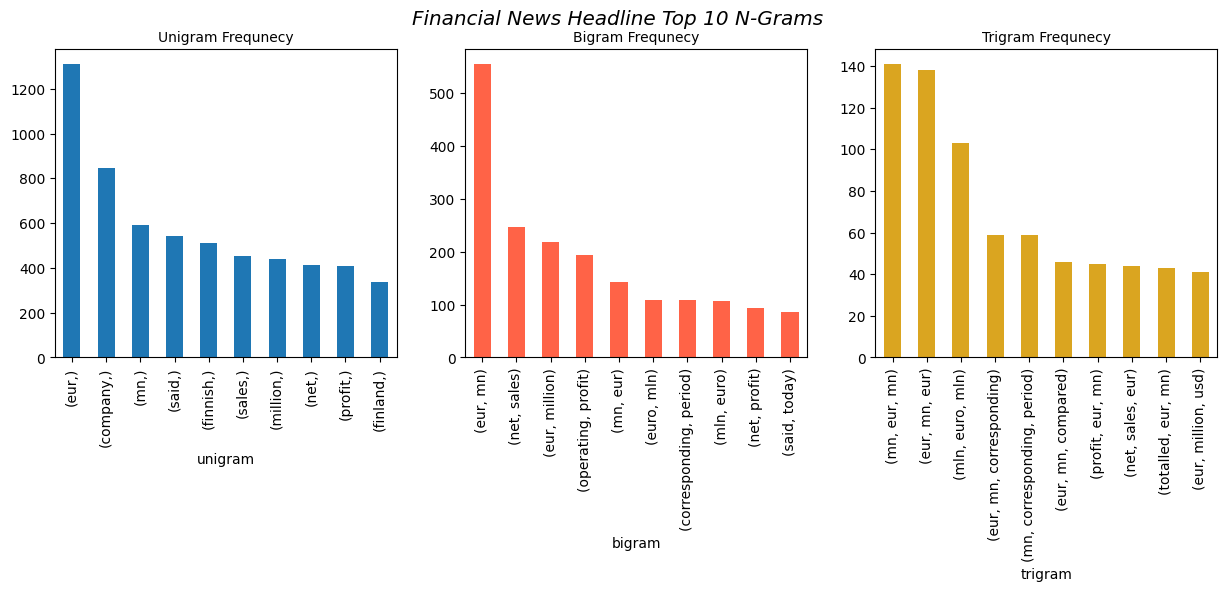

In [11]:
#Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

#Unigram barchart
uni = plt.subplot(1,3,1)
uni.set_title('Unigram Frequnecy', fontsize = 'medium')
unigram_df[:10].plot(x='unigram', y='frequency', kind='bar', ax=axs[0])
#Bigram barchart
bi = plt.subplot(1,3,2)
bi.set_title('Bigram Frequnecy', fontsize = 'medium')
bigram_df[:10].plot(x='bigram', y='frequency', kind='bar', ax=axs[1], color="tomato")
#Trigram barchart
tri = plt.subplot(1,3,3)
tri.set_title('Trigram Frequnecy', fontsize = 'medium')
trigram_df[:10].plot(x='trigram', y='frequency', kind='bar', ax=axs[2], color="goldenrod")

#Remove legends from each of the barcharts
axs[0].get_legend().remove()
axs[1].get_legend().remove()
axs[2].get_legend().remove()

#Final subplot chart
fig.suptitle("Financial News Headline Top 10 N-Grams", fontsize = 'x-large', fontstyle = 'italic')
plt.show()

##Task 2: N-Gram Modeling

### Data Splitting

&emsp; Now the some of the preliminary understand of the data is complete the next step is to create the models. To create the models, the data is split into the training set and the testing set. To ensure that a good representation of all of the new headlines, an additional input of the `train_test_split` is included. This input is the `stratisfy` function. By including it, and applying it to the column for the news headline sentiment, and using a test size of 20%, the training data will include loop through each of the sentiments and pull 80% of each to use in the training set.

In [12]:
#Create training and testing datasets
X_train, X_test = train_test_split(data['newsheadline'], test_size=0.2, random_state=42, stratify=data['sentiment'])

### Model Training

&emsp; Before the model can be train, a function needs to be developed that breaks down each of the sentences in the data, and returns the conditional probability of all of the n-grams in that sentence. The function is slightly over developed since the model is only working with unigram, bigram & trigrams. Because of this the function looks for each *n* of 1, 2 & 3.

In [13]:
def calc_probabilities(ngrams, n):
  for x in ngrams.items():
    text = x[0]
    def dtext(text):
        if n == 1:
          return text[0]
        if n == 2:
          return text[0],
        if n == 3:
          return tuple([text[0],text[1]])
    def dict_lookup(n):
      if n == 1:
        return train_unigram_dict
      if n == 2:
        return train_bigram_dict
      if n == 3:
        return train_trigram_dict
    def numerator(text):
      try:
          return dict_lookup(n)[text]
      except:
          return 0
    def denominator(text):
      try:
        if n == 1:
          return sum(dict_lookup(n).values())
        else:
          return dict_lookup(n-1)[dtext(text)]
      except:
          return 0
    def probability(text):
      if denominator(text) == 0:
        return 0
      else :
        return(round(numerator(text) / denominator(text),6))
  return {ngram: probability(ngram) for ngram, count in ngrams.items()}

&emsp; Recreate the Counter and dictionary on the training set of the data. These will be referenced in the creation of the model.

In [14]:
# Apply function to create n-gram lists
train_unigrams = generate_ngrams(X_train, 1)
train_bigrams = generate_ngrams(X_train, 2)
train_trigrams = generate_ngrams(X_train, 3)

# Create Counter from n-gram lists
train_unigram_freq = Counter(train_unigrams)
train_bigram_freq = Counter(train_bigrams)
train_trigram_freq = Counter(train_trigrams)

# Create dictionaries from n-gram lists
train_unigram_dict = {ngram: count for ngram, count in train_unigram_freq.items()}
train_bigram_dict = {ngram: count for ngram, count in train_bigram_freq.items()}
train_trigram_dict = {ngram: count for ngram, count in train_trigram_freq.items()}

&emsp; Finally by utilizing the function that calculates the conditional probability and the dictionary of the trained n-gram frequencies, the model is created.

In [15]:
unigram_model = calc_probabilities(train_unigram_freq, 1)
bigram_model = calc_probabilities(train_bigram_freq, 2)
trigram_model = calc_probabilities(train_trigram_freq, 3)

### Perplexity Calculation

&emsp; Now that the model is created, it needs to be evaluted in how well it understands the data given the number of n-grams it uses. To do this the ***perplexity*** needs to be calclauted, and to accomplish a function is created. The function first computes the overall sentence probability, which is accomplished by applying Markovian assumptions of multiplying each n-gram probability together to output a sentence probability. The sentence probability is then fed into the remaining formula of the perplexity calculation (given below)

<div align="center">

$$ perplexity(W) = \sqrt[N]{\prod_{i=1}^{N}\frac{1}{P(w_{i}|w_{1},\dots,w_{i-1})}}$$

</div>

In [16]:
def calculate_perplexity(data, model, n):
  for sentence in data:
    prob = 1
    for gram in generate_ngrams(data,n):
      N = len(generate_ngrams(data,n))
      p = model.get(gram,0)
      prob = prob * p
      perplexity = round(pow((1/prob),(1/N)),2) if prob > 0 else 999999
    return perplexity

### Comparison

&emsp; From here, the perplexity function is then applied to each sentence in the test dataset for each of the n-gram models that is being evaluated. The output of the sentence perplexity is stored in a new series. A final equation computes the average perplexity for each sentence to give an overall perplexity for the n-gram model.\
&emsp; From the data below, the **unigram** model is the best, given it's lower perplexity. This is potentially from the number of unseen n-grams that are apparent in the bigram & trigrams test sets.

In [17]:
unigram_pp = X_test.apply(lambda t: calculate_perplexity(ngrams_tuple(t,1),unigram_model,1))
bigram_pp = X_test.apply(lambda t: calculate_perplexity(ngrams_tuple(t,2),bigram_model,2))
trigram_pp = X_test.apply(lambda t: calculate_perplexity(ngrams_tuple(t,3),trigram_model,3))

In [18]:
print(tabulate([['Unigram', unigram_pp.mean()], ['Bigram', bigram_pp.mean()],  ['Trigram', trigram_pp.mean()]], headers=['Model', 'Perplexity'], tablefmt='orgtbl'))

| Model   |   Perplexity |
|---------+--------------|
| Unigram |       526645 |
| Bigram  |       924587 |
| Trigram |       950412 |


## Task 3: Handling Unseen N-Grams

### Implement Laplace Smoothing

&emsp; As mentioned before, there is the possibility that the test set has unseen n-grams, most noticably with the bigrams and trigrams. To address this, and hopefully create a better model, the data will be smoothed. For this analysis the data will be smoothed with a Laplace (add-one) smoothing.

&emsp; A function is created that will apply the Laplace smoothing to the datasets. For example, the bigram model follows the smoothing equation:
<div align="center">

$$ P_{Laplace}(w_{n}|w_{n-1}) = \frac{C(w_{n-1}w_{n})+1}{C(w_{n-1})+V}$$

</div>

In [19]:
def laplace_smoothing(data , n):
  grams = Counter(generate_ngrams(data, n))
  for x in grams:
    def v_lookup(n):
        if n == 1:
          return unigram_dict
        if n == 2:
          return bigram_dict
        if n == 3:
          return trigram_dict
    def d_lookup(n):
        if n == 1:
          return train_unigram_dict
        if n == 2:
          return train_bigram_dict
        if n == 3:
          return train_trigram_dict
    def prob(x):
      p = d_lookup(n).get(x,0)+1
      d = sum(d_lookup(n).values())
      v = sum(v_lookup(n).values())
      return p / (d+v)
  return {ngram: prob(ngram) for ngram in grams.keys()}

&emsp; A new model, denoted by the prefix of `smooth_` is created for each of n-gram that is being evaluated.

In [20]:
smooth_unigram_model = laplace_smoothing(data['newsheadline'], 1)
smooth_bigram_model = laplace_smoothing(data['newsheadline'], 2)
smooth_trigram_model = laplace_smoothing(data['newsheadline'], 3)

### Recalculate Perplexity

&emsp; Apply perplexisty function to the test data and print results

In [21]:
smooth_unigram_pp = X_test.apply(lambda t: calculate_perplexity(ngrams_tuple(t,1),smooth_unigram_model,1))
smooth_bigram_pp = X_test.apply(lambda t: calculate_perplexity(ngrams_tuple(t,2),smooth_bigram_model,2))
smooth_trigram_pp = X_test.apply(lambda t: calculate_perplexity(ngrams_tuple(t,3),smooth_trigram_model,3))

&emsp; Similar to the first model, the perplexity function is then applied to each sentence in the test dataset for each of the smoothed n-gram models, and a final equation computes the average perplexity for each sentence to give an overall perplexity for the n-gram model.

### Comparative Analysis

&emsp; The first thing that can be seen is that the overall perplexity has decreased from the first n-gram models. This is due to the fact that the smoothed model can find each of the n-grams, even if the conditional probabilty is very low. Again the **unigram** model is the best, given it's lower perplexity.

In [22]:
print(tabulate([
    ['Unigram', round(unigram_pp.mean()), round(smooth_unigram_pp.mean()) ],
    ['Bigram', round(bigram_pp.mean()), round(smooth_bigram_pp.mean()) ],
    ['Trigram', round(trigram_pp.mean()), round(smooth_trigram_pp.mean()) ]],
    headers=['Model', 'N-Gram Perplexity','Smoothed Perplexity'], tablefmt='orgtbl')
  )

| Model   |   N-Gram Perplexity |   Smoothed Perplexity |
|---------+---------------------+-----------------------|
| Unigram |              526645 |                  7442 |
| Bigram  |              924587 |                 60644 |
| Trigram |              950412 |                 72798 |


## Task 4: Interpolation

### Implement Interpolation

&emsp; Since there could be a large number of unseen n-grams, Interpolation can be utilized to draw a conclusion of the probability of an n-gram. The interpolation looks to see if a trigram, bigram and unigram exist for a selected trigram. From there weights are applied to each, and then the probabilities are summed together to get a final probaility.\
&emsp; A function is created to create the new probabilties of the n-gram following the equation below
<div align="center">

$$ \hat{P}(w_{n}|w_{n-2}w_{n-1}) = \lambda_{1}{P}(w_{n}) + \lambda_{2}{P}(w_{n}|w_{n-1}) + \lambda_{3}{P}(w_{n}|w_{n-2}w_{n-1}) $$

</div>

In [34]:
def interpolate_models(unigram_model, unigram_w, bigram_model, bigram_w, trigram_model, trigram_w ):
    interpolated_model = {}
    for ngram in set(list(unigram_model.keys()) + list(bigram_model.keys()) + list(trigram_model.keys())):
        unigram_prob = unigram_model.get(ngram, 0)
        bigram_prob = bigram_model.get(ngram, 0)
        trigram_prob = trigram_model.get(ngram, 0)
        interpolated_model[ngram] = (unigram_w * unigram_prob +
                                     bigram_w * bigram_prob +
                                     trigram_w * trigram_prob)
    return interpolated_model

&emsp; The weights in this instance were given, and then applied to the n-gram models.

In [35]:
interpolate_models = interpolate_models(unigram_model, 0.7, bigram_model, 0.2, trigram_model, 0.1)

### Perplexity Calculation with Interpolation

&emsp; Lastly, the perplexity of the interploated model is cacluated against the test data and stored in a series.

In [28]:
interpolate_pp = X_test.apply(lambda t: calculate_perplexity(ngrams_tuple(t,3),interpolate_models,3))

### Analysis

&emsp; Print perplexity of each model and describe

In [29]:
print(tabulate([
    ['Unigram', round(unigram_pp.mean()), round(smooth_unigram_pp.mean()), round(interpolate_pp.mean()) ],
    ['Bigram', round(bigram_pp.mean()), round(smooth_bigram_pp.mean()) , round(interpolate_pp.mean())],
    ['Trigram', round(trigram_pp.mean()), round(smooth_trigram_pp.mean()), round(interpolate_pp.mean()) ]],
    headers=['Model', 'N-Gram Perplexity','Smoothed Perplexity','Interpolated'], tablefmt='orgtbl')
  )

| Model   |   N-Gram Perplexity |   Smoothed Perplexity |   Interpolated |
|---------+---------------------+-----------------------+----------------|
| Unigram |              526645 |                  7442 |         950414 |
| Bigram  |              924587 |                 60644 |         950414 |
| Trigram |              950412 |                 72798 |         950414 |
